In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
!unzip /content/drive/MyDrive/資料集.zip

Archive:  /content/drive/MyDrive/資料集.zip
   creating: ╕ъо╞╢░/
  inflating: ╕ъо╞╢░/test.csv  
  inflating: ╕ъо╞╢░/train.csv  


In [ ]:
import csv
import pandas as pd
all_features_df = pd.read_csv('/content/drive/MyDrive/train_cls.csv')
all_features_df

,Cluster,TimeGroup,contp,csmcu,ecfg,conam_digit,Y,txkey
0,C3,6,5,0,N,3,N,516056.0
1,C3,4,5,0,N,3,N,4376.0
2,C3,6,5,0,N,3,N,483434.0
3,C2,6,5,62,N,4,N,1407164.0
4,C2,7,5,62,N,3,N,1051004.0
...,...,...,...,...,...,...,...,...
1509201,C6,3,5,62,Y,3,N,1837407.0
1509202,C4,6,5,62,N,4,N,1264771.0
1509203,C4,6,5,62,Y,0,N,648566.0
1509204,C6,7,5,62,Y,0,N,647521.0


In [ ]:
from collections import Counter
Counter(all_features_df['Cluster'])

Counter({'C3': 202997,
         'C2': 652883,
         'C1': 136925,
         'C6': 107031,
         'C4': 146238,
         'C5': 255462,
         'C7': 7670})

In [ ]:
all_features_df['Cluster'] = all_features_df['Cluster'].replace(['C1'],'1')
all_features_df['Cluster'] = all_features_df['Cluster'].replace(['C2'],'2')
all_features_df['Cluster'] = all_features_df['Cluster'].replace(['C3'],'3')
all_features_df['Cluster'] = all_features_df['Cluster'].replace(['C4'],'4')
all_features_df['Cluster'] = all_features_df['Cluster'].replace(['C5'],'5')
all_features_df['Cluster'] = all_features_df['Cluster'].replace(['C6'],'6')
all_features_df['Cluster'] = all_features_df['Cluster'].replace(['C7'],'7')

In [ ]:
Counter(all_features_df['Y'])

Counter({'N': 1489046, 'Y': 20160})

In [ ]:
all_features_df['Y'] = all_features_df['Y'].replace(['N'],'1')
all_features_df['Y'] = all_features_df['Y'].replace(['Y'],'2')

In [ ]:
all_features_df['ecfg'] = all_features_df['ecfg'].replace(['N'],'1')
all_features_df['ecfg'] = all_features_df['ecfg'].replace(['Y'],'2')

In [ ]:
all_features_df

,Cluster,TimeGroup,contp,csmcu,ecfg,conam_digit,Y,txkey
0,3,6,5,0,1,3,1,516056.0
1,3,4,5,0,1,3,1,4376.0
2,3,6,5,0,1,3,1,483434.0
3,2,6,5,62,1,4,1,1407164.0
4,2,7,5,62,1,3,1,1051004.0
...,...,...,...,...,...,...,...,...
1509201,6,3,5,62,2,3,1,1837407.0
1509202,4,6,5,62,1,4,1,1264771.0
1509203,4,6,5,62,2,0,1,648566.0
1509204,6,7,5,62,2,0,1,647521.0


In [ ]:
all_features_df.columns

Index(['Cluster', 'TimeGroup', 'contp', 'csmcu', 'ecfg', 'conam_digit', 'Y',
       'txkey'],
      dtype='object')

In [ ]:
all_features_df = all_features_df.reindex(columns=['Cluster', 'TimeGroup', 'contp', 'csmcu', 'ecfg', 'conam_digit', 'txkey', 'Y'])
all_features_df

,Cluster,TimeGroup,contp,csmcu,ecfg,conam_digit,txkey,Y
0,3,6,5,0,1,3,516056.0,1
1,3,4,5,0,1,3,4376.0,1
2,3,6,5,0,1,3,483434.0,1
3,2,6,5,62,1,4,1407164.0,1
4,2,7,5,62,1,3,1051004.0,1
...,...,...,...,...,...,...,...,...
1509201,6,3,5,62,2,3,1837407.0,1
1509202,4,6,5,62,1,4,1264771.0,1
1509203,4,6,5,62,2,0,648566.0,1
1509204,6,7,5,62,2,0,647521.0,1


In [ ]:
X,Y = all_features_df.iloc[:,0:-1].values, all_features_df.iloc[:,-1]
all_features_df.iloc[0:4]

,Cluster,TimeGroup,contp,csmcu,ecfg,conam_digit,txkey,Y
0,3,6,5,0,1,3,516056.0,1
1,3,4,5,0,1,3,4376.0,1
2,3,6,5,0,1,3,483434.0,1
3,2,6,5,62,1,4,1407164.0,1


In [ ]:
X

array([['3', 6, 5, ..., '1', 3, 516056.0],
       ['3', 4, 5, ..., '1', 3, 4376.0],
       ['3', 6, 5, ..., '1', 3, 483434.0],
       ...,
       ['4', 6, 5, ..., '2', 0, 648566.0],
       ['6', 7, 5, ..., '2', 0, 647521.0],
       ['3', 4, 5, ..., '1', 3, 2380.0]], dtype=object)

In [ ]:
Y

0          1
1          1
2          1
3          1
4          1
          ..
1509201    1
1509202    1
1509203    1
1509204    1
1509205    1
Name: Y, Length: 1509206, dtype: object

# **`train_test_split(...)，`**
1.資料的x的部分
2.資料的y的部分
3.test的部分要佔全部資料的多少
4.指定一個隨機種子，0的話就是隨機囉

In [ ]:
from sklearn.model_selection import train_test_split
train_X, test_X, train_Y, test_Y = train_test_split(X, Y, test_size = 0.2, random_state=0)

In [ ]:
type(train_X)

train_X[0:2]

array([['5', 6, 5, 62, '1', 3, 1723305.0],
       ['6', 8, 5, 62, '1', 0, 1920304.0]], dtype=object)

In [ ]:
train_X.shape

(1207364, 7)

In [ ]:
test_X.shape

(301842, 7)

In [ ]:
train_Y

213787     1
308224     1
519446     1
919498     1
1474233    1
          ..
152315     1
963395     1
117952     1
1484405    1
305711     1
Name: Y, Length: 1207364, dtype: object

In [ ]:
test_Y

1291781    1
500215     1
607543     1
75832      1
1081360    1
          ..
828674     1
907113     1
1178416    1
808779     1
430941     1
Name: Y, Length: 301842, dtype: object

In [ ]:
all_features_df.groupby(['Y']).size()


Y
1    1489046
2      20160
dtype: int64

# **`平衡`**

In [ ]:
pip install -U imbalanced-learn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Using cached imbalanced_learn-0.9.1-py3-none-any.whl (199 kB)


In [ ]:
from collections import Counter
Counter(train_Y)

Counter({'1': 1191278, '2': 16086})

In [ ]:
from imblearn.under_sampling import RandomUnderSampler
rus  = RandomUnderSampler(random_state=42)
train_bl_X, train_bl_Y = rus.fit_resample(train_X, train_Y)
train_bl_Y

0        1
1        1
2        1
3        1
4        1
        ..
32167    2
32168    2
32169    2
32170    2
32171    2
Name: Y, Length: 32172, dtype: object

In [ ]:
from collections import Counter
type(train_bl_Y)
Counter(train_bl_Y)

Counter({'1': 16086, '2': 16086})

# **`訓練`**

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
rf = RandomForestClassifier(n_estimators = 100,max_depth = None,min_samples_split=2,random_state = 0)

# scores = cross_validate(rf,train_bl_X,train_bl_Y,cv=10,scoring='accuracy')
# print(scores)
# print(scores.mean())

rf_cv_score=cross_val_score(estimator=rf,X=train_bl_X,y=train_bl_Y,cv=5)
print(rf_cv_score)


[0.8958819  0.8951049  0.89353435 0.88498601 0.88856077]


In [ ]:
from sklearn import model_selection, svm, preprocessing, metrics
from sklearn.metrics import classification_report

# 建立模型
rf.fit(train_bl_X, train_bl_Y)
# 預測
test_y_predicted = rf.predict(test_X)
# 績效
accuracy_scores=rf.score(test_X,test_Y)
print(accuracy_scores)

accuracy = metrics.accuracy_score(test_Y, test_y_predicted)
print(classification_report(test_Y,test_y_predicted))



0.8786053630707457
              precision    recall  f1-score   support

           1       1.00      0.88      0.93    297768
           2       0.09      0.91      0.17      4074

    accuracy                           0.88    301842
   macro avg       0.55      0.89      0.55    301842
weighted avg       0.99      0.88      0.92    301842



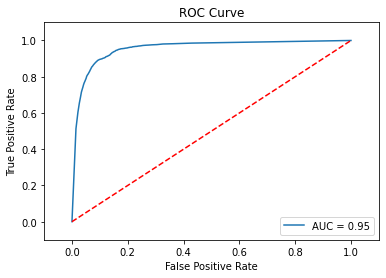

In [ ]:
from matplotlib import pyplot as plt
##AUC
from sklearn.metrics import roc_curve, auc  ###計算roc和auc
y_preds=rf.predict_proba(test_X)
# take the second column because the classifier outputs scores for
# the 0 class as well
preds = y_preds[:,1]
# fpr means false-positive-rate
# tpr means true-positive-rate
fpr, tpr, _ = roc_curve(test_Y.astype(int), preds,pos_label=2)
auc_score = auc(fpr, tpr)
# clear current figure
plt.clf()
plt.title('ROC Curve')
plt.plot(fpr, tpr, label='AUC = {:.2f}'.format(auc_score))
# it's helpful to add a diagonal to indicate where chance 
# scores lie (i.e. just flipping a coin)
plt.plot([0,1],[0,1],'r--')
plt.xlim([-0.1,1.1])
plt.ylim([-0.1,1.1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend(loc='lower right')
plt.show()